# **Week Five Assignment: Risk**

This assignment simulates and visualises battles in the game of Risk. We begin by simulating individual battle rounds between a 3-dice attacker and a 2-dice defender, following Risk's combat rules. We then extend this to a full battle where two armies, each starting with 40 troops, fight until one side is eliminated. 

**Author: Brianne McGrath**

----

## **Rules of a Single Battle Round**
In each round:
1. The attacker can roll up to 3 dice, while the defender rolls up to 2 dice.
2. The highest rolls from each side are compared:
   - If the attacker's roll is higher, the defender loses one troop.
   - Otherwise, the attacker loses one troop.
3. The second-highest dice are also compared in the same way.

---

## **Step 1: Simulating a Battle Round**

The function below simulates a battle round according to the rules above. It returns the number of troops lost by the attacker and the defender.

In [1]:
# import necessary libraries
 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def battle_round():
    # 3 dice rolls for attacker and 2 dice rolls for defender
    a_rolls = np.random.randint(1,7, size=3)
    d_rolls = np.random.randint(1,7, size=2)

    # sorting rolls in descending order
    a_rolls = np.sort(a_rolls)[::-1]
    d_rolls = np.sort(d_rolls)[::-1]

    # troop losses
    a_losses = 0
    d_losses = 0

    if a_rolls[0] > d_rolls[0]:
        d_losses += 1
    else:
        a_losses += 1

    return a_losses, d_losses

# testing function
a_losses, d_losses = battle_round()
print(f"Attacker Losses: {a_losses}, Defender Losses: {d_losses}")


Attacker Losses: 1, Defender Losses: 0


## **Step 2: Simulating 1,000 Battle Rounds**

We will now simulate 1,000 battle rounds using the `battle_round` function.

In [3]:
def simulate_battles(num_rounds):
    total_a_losses = 0
    total_d_losses = 0 

    for i in range(num_rounds):
        a_losses, d_losses = battle_round()
        total_a_losses += a_losses
        total_d_losses += d_losses

    return total_a_losses, total_d_losses

# simulate 1,000 battles
num_rounds = 1000
total_losses = simulate_battles(num_rounds)

print(f"Total Attacker Losses: {total_losses[0]}, Total Defender Losses: {total_losses[1]}")

Total Attacker Losses: 514, Total Defender Losses: 486


## **Step 3: Plotting the Results**

We will now plot the total losses for both sides - attacker and defender. 

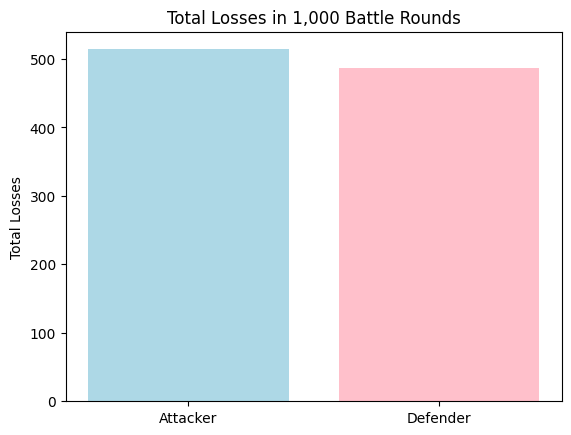

In [4]:
def plot_losses(total_a_losses, total_d_losses):
    labels = ['Attacker', 'Defender']
    losses = [total_a_losses, total_d_losses]
    
    # creating bar chart
    plt.bar(labels, losses, color=['lightblue', 'pink'])
    plt.ylabel('Total Losses')
    plt.title('Total Losses in 1,000 Battle Rounds')
    plt.show()

# plotting
plot_losses(total_losses[0], total_losses[1])


## **Step 4: Full Battle - Two Players**

Simulate a full battle between two players. Both sides starts with 40 troops, and the battle continues until one side is completely eliminated. 

We plot the remaining troops for both attacker and defender over each round to show the battle's progression, highlighting troop loss rates.

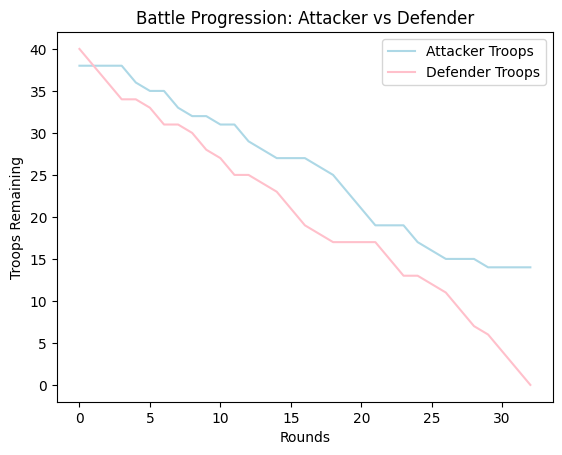

In [5]:
def full_battle(a_troops=40, d_troops=40):
    total_a_losses = 0
    total_d_losses = 0 
    a_progress = []
    d_progress = []

    while a_troops > 0 and d_troops > 0:
        a_rolls = np.random.randint(1,7, size=min(a_troops, 3)) # up to 3 dice
        d_rolls = np.random.randint(1,7, size=min(d_troops, 2)) # up to 2 dice

        # sorting rolls in descending order
        a_rolls = np.sort(a_rolls)[::-1]
        d_rolls = np.sort(d_rolls)[::-1]
    
        if a_rolls[0] > d_rolls[0]:
            d_troops -= 1
            total_d_losses += 1
        else: 
            a_troops -= 1
            total_a_losses += 1

        # comparing second highest dice if necessary

        if len(d_rolls) > 1:
            if a_rolls[1] > d_rolls[1]:
                d_troops -= 1
                total_d_losses += 1
            else: 
                a_troops -= 1
                total_a_losses += 1
        
        # append current troops after each round
        a_progress.append(a_troops)
        d_progress.append(d_troops)

    return a_progress, d_progress

# run the battle and get results
a_progress, d_progress = full_battle()

# plot the progression of the battle
plt.plot(a_progress, label="Attacker Troops", color='lightblue')
plt.plot(d_progress, label="Defender Troops", color='pink')
plt.xlabel("Rounds")
plt.ylabel("Troops Remaining")
plt.title("Battle Progression: Attacker vs Defender")
plt.legend()
plt.show()

___

## **References:**

- https://www.ultraboardgames.com/risk/game-rules.php?utm_content=cmp-true (Rules of Risk)
- https://www.dicebreaker.com/games/risk/how-to/how-to-play-risk-board-game#how-to-play-risk-two-players (Two Player Battle)
- https://campus.datacamp.com/courses/intermediate-python/loops?ex=1 (Loops)
- https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html (Matplotlib Help)
- https://numpy.org/devdocs/reference/generated/numpy.sort.html (Numpy Sorting)
- https://numpy.org/doc/2.0/reference/random/generated/numpy.random.randint.html (Numpy Randomg Integer)
___

## **END**